<a href="https://colab.research.google.com/github/RecursionReaper/ESP_9/blob/main/Air_Quality_Prediction_Delhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
aqi_df = pd.read_csv('/content/delhi_aqi.csv')
aqi_df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
weather_df=pd.read_csv('/content/weatherdata.csv')
weather_df.head()

,Date,Year,Month,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation
0,1,2010,1,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,8.0,4.9,0.0,29.2,29.2,29.1,0.0
1,2,2010,1,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,8.0,4.8,3.0,29.3,29.3,29.2,0.0
2,3,2010,1,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,12.0,7.4,3.0,29.3,29.2,29.2,0.0
3,4,2010,1,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,15.0,11.0,7.0,29.3,29.2,29.1,0.0
4,5,2010,1,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,14.0,5.7,0.0,29.2,29.1,29.1,0.0


In [ ]:
aqi_df['datetime']=pd.to_datetime(aqi_df['date']).dt.date
aqi_df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,datetime
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25


In [ ]:
weather_df['datetime']=pd.to_datetime(dict(year=weather_df['Year'],month=weather_df['Month'],day=weather_df['Date'])).dt.date
weather_df.head()

,Date,Year,Month,Max Temperature,Avg Temperature,Min Temperature,Max Dew Point,Avg Dew Point,Min Dew Point,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation,datetime
0,1,2010,1,70.0,55.7,45.0,52.0,47.5,41.0,100.0,77.5,43.0,8.0,4.9,0.0,29.2,29.2,29.1,0.0,2010-01-01
1,2,2010,1,59.0,50.6,46.0,54.0,49.6,46.0,100.0,96.7,77.0,8.0,4.8,3.0,29.3,29.3,29.2,0.0,2010-01-02
2,3,2010,1,57.0,52.8,48.0,57.0,52.1,48.0,100.0,97.3,82.0,12.0,7.4,3.0,29.3,29.2,29.2,0.0,2010-01-03
3,4,2010,1,55.0,51.0,48.0,50.0,48.4,48.0,100.0,91.9,77.0,15.0,11.0,7.0,29.3,29.2,29.1,0.0,2010-01-04
4,5,2010,1,63.0,53.1,46.0,52.0,47.9,46.0,100.0,85.1,55.0,14.0,5.7,0.0,29.2,29.1,29.1,0.0,2010-01-05


In [ ]:
merged_df=pd.merge(aqi_df,weather_df,on='datetime',how='inner')
merged_df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,datetime,...,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,2020-11-25,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,2020-11-25,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,2020-11-25,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,2020-11-25,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,2020-11-25,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0


In [ ]:
merged_df.drop(columns=['datetime','Year','Month','Date'],inplace=True)

In [ ]:
merged_df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,Max Temperature,...,Max Humidity,Avg Humidity,Min Humidity,Max Wind Speed,Avg Wind Speed,Min Wind Speed,Max Pressure,Avg Pressure,Min Pressure,Total Precipitation
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,73.0,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,73.0,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,73.0,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,73.0,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,73.0,...,82.0,61.2,36.0,7.0,3.9,0.0,29.3,29.2,29.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18747,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27,68.0,...,100.0,85.3,64.0,12.0,5.8,0.0,29.2,29.1,29.1,0.0
18748,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12,68.0,...,100.0,85.3,64.0,12.0,5.8,0.0,29.2,29.1,29.1,0.0
18749,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54,68.0,...,100.0,85.3,64.0,12.0,5.8,0.0,29.2,29.1,29.1,0.0
18750,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47,68.0,...,100.0,85.3,64.0,12.0,5.8,0.0,29.2,29.1,29.1,0.0


In [ ]:
merged_df.dropna(inplace=True)

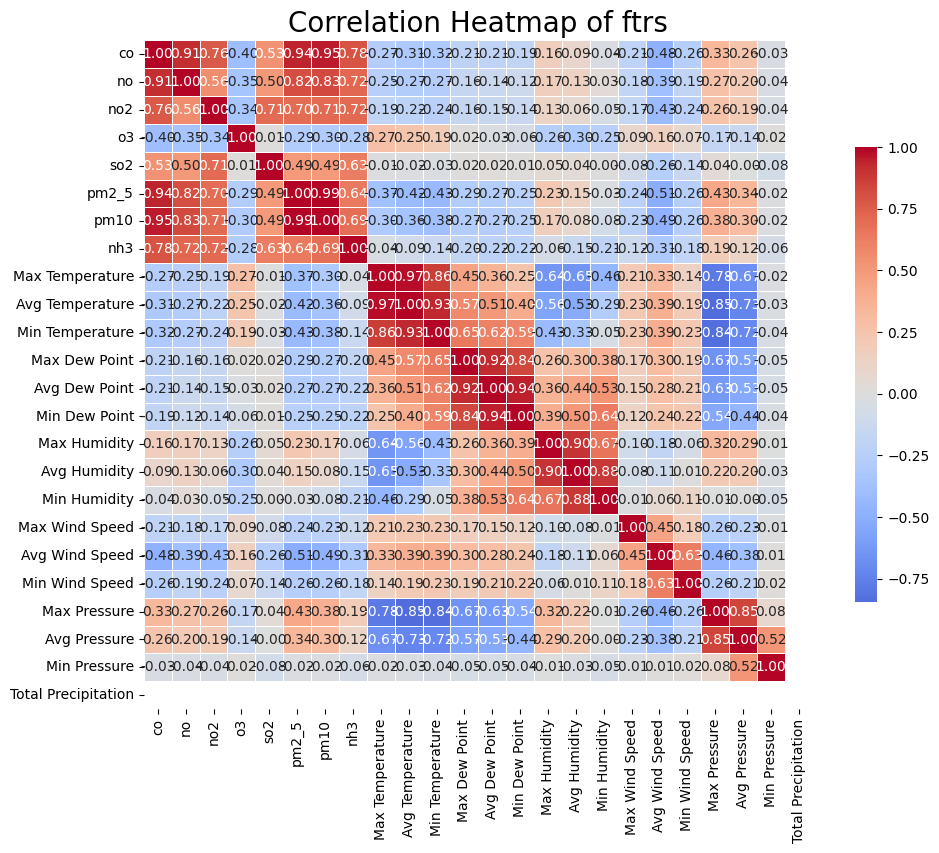

In [ ]:
corr_matrix=merged_df.select_dtypes(include='number').corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap='coolwarm',center=0,square=True,cbar_kws={"shrink":.5},linewidths=0.5)
plt.title("Correlation Heatmap of ftrs",fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
target = "pm2_5"

In [ ]:
features = merged_df.select_dtypes(include='number').columns.tolist()
features.remove(target)

In [ ]:
x=merged_df[features]
y=merged_df[target]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
x_test_scaled=scaler.transform(X_test)

In [ ]:
rf= RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train_scaled,y_train)

RandomForestRegressor(random_state=42)

<ipython-input-17-5d6f9896291a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_df,x='importance',y='features',palette='viridis')


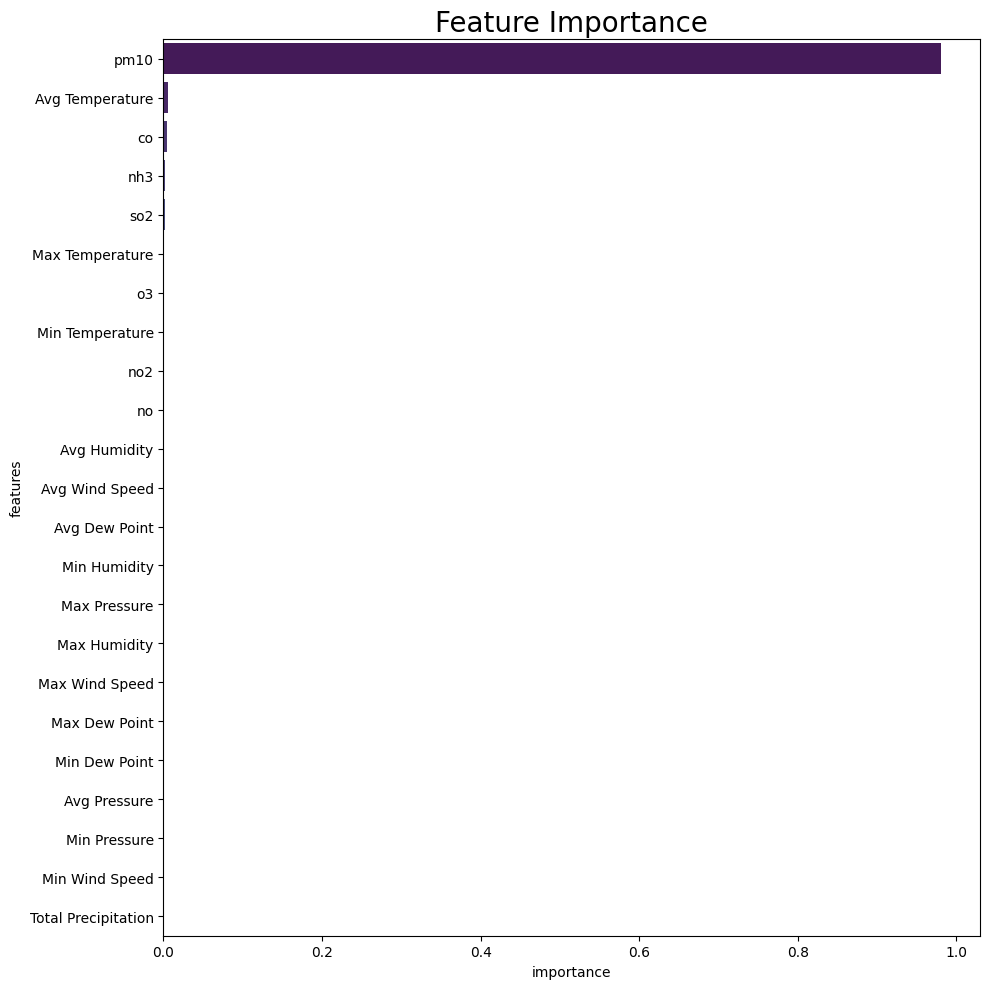

In [ ]:
importances= rf.feature_importances_
features_names=x.columns
feat_df=pd.DataFrame({'features':features_names,'importance':importances}).sort_values(by='importance',ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(data=feat_df,x='importance',y='features',palette='viridis')
plt.title("Feature Importance",fontsize=20)
plt.tight_layout()
plt.show()

In [ ]:
y_pred=rf.predict(x_test_scaled)

In [ ]:
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mean_squared_error(y_pred,y_test))
r2_score=r2_score(y_pred,y_test)

In [ ]:
print("mae: ",mae)
print("rmse: ",rmse)
print("r2: ",r2_score)

mae:  8.671302585977072
rmse:  14.617479010877602
r2:  0.9956546308934868


In [ ]:
joblib.dump(rf,"aqi_rf.joblib")
joblib.dump(scaler,"scaler.joblib")

['scaler.joblib']

In [ ]:
merged_df.to_csv("aqi_data.csv",index=False)

In [ ]:
from google.colab import files
files.download('aqi_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download("aqi_rf.joblib")
files.download("scaler.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>